# Redes Neuronales: Práctico 3

## Ejercicio A

Implementá una red feed-forward auto-encoder con una capa oculta para aprender la función identidad
con la base de datos MNIST de dígitos escritos a mano y digitalizados. La red debe tener 784 unidades de
entrada (pues los dígitos tienen 28 por 28 píxeles), una capa oculta de 64 neuronas y una capa de salida
de 784 neuronas. Usá la función de error cuadrático medio para el descenso por el gradiente estocástico
(SGD), implementá dropout con p = 0.1 y minibatch de tamaño 1000. Recordá que la base MNIST tiene
60000 imágenes en el conjunto de entrenamiento y 10000 imágenes en el conjunto de test.
Graficá el Error en función de las épocas y la función tanto para el aprendizaje como para el
testeo. 

Presentá los gráficos que creas necesarios para convencerme de que anda bien.

Para completar el práctico vamos a utilizar el dataset de MNIST que ya viene cargado en Keras.

In [9]:
import keras
from keras import layers
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import SGD
import numpy as np
# Debemos cargar los conjuntos de train y de test de acuerdo a la documentación.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [10]:
# Dimension de la hidden layer
encoder_dim = 64
autoenc = Sequential()

# Vamos a recibir un objeto con 784 elementos (28x28 pixeles), con cuidado de agregar una dimensión vacía
# Debe ser del tipo Dropout
autoenc.add(layers.Dropout(0.1, input_shape=(784,)))

# Usamos RELU como función de activación para este caso.
autoenc.add(layers.Dense(encoder_dim, activation="relu"))
# Capa de "decodificacion", recibe 784, usamos activación sigmoide.
autoenc.add(layers.Dense(784, activation="sigmoid"))

In [11]:
# Compilamos todo junto, eligiendo nuestro optimizador y la función de pérdida
autoenc.compile(optimizer="sgd", loss="mean_squared_error")

In [12]:
# Preprocesamos los datos

# Tenemos que normalizar para lograr mejores resultados, vamos a llevar todo desde los valores [0,255] a [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0
print(f"Forma de los datos al empezar: x_train = {x_train.shape}, x_test = {x_test.shape}")

# Tenemos que hacer nuestro input chato, las imágenes de MNIST vienen como matrices 28x28
x_train = x_train.reshape((x_train.shape[0], np.prod(x_train.shape[1:])))
x_test = x_test.reshape((x_test.shape[0], np.prod(x_test.shape[1:])))
print(f"Forma de los datos al terminar: x_train = {x_train.shape}, x_test = {x_test.shape}")


Forma de los datos al empezar: x_train = (60000, 28, 28), x_test = (10000, 28, 28)
Forma de los datos al terminar: x_train = (60000, 784), x_test = (10000, 784)


In [13]:
# Entrenamos el autoencoder,
autoenc.fit(
    x_train, x_train,
    epochs=25,
    verbose=2
)

Epoch 1/25
1875/1875 - 3s - loss: 0.2274
Epoch 2/25
1875/1875 - 3s - loss: 0.2131
Epoch 3/25
1875/1875 - 2s - loss: 0.1794
Epoch 4/25
1875/1875 - 2s - loss: 0.1316
Epoch 5/25
1875/1875 - 3s - loss: 0.0990
Epoch 6/25
1875/1875 - 2s - loss: 0.0850
Epoch 7/25
1875/1875 - 2s - loss: 0.0791
Epoch 8/25
1875/1875 - 2s - loss: 0.0762
Epoch 9/25
1875/1875 - 2s - loss: 0.0745
Epoch 10/25
1875/1875 - 2s - loss: 0.0734
Epoch 11/25
1875/1875 - 2s - loss: 0.0726
Epoch 12/25
1875/1875 - 2s - loss: 0.0720
Epoch 13/25
1875/1875 - 3s - loss: 0.0716
Epoch 14/25
1875/1875 - 2s - loss: 0.0712
Epoch 15/25
1875/1875 - 2s - loss: 0.0709
Epoch 16/25
1875/1875 - 2s - loss: 0.0706
Epoch 17/25
1875/1875 - 2s - loss: 0.0703
Epoch 18/25
1875/1875 - 2s - loss: 0.0700
Epoch 19/25
1875/1875 - 2s - loss: 0.0698
Epoch 20/25
1875/1875 - 2s - loss: 0.0696
Epoch 21/25
1875/1875 - 2s - loss: 0.0694
Epoch 22/25
1875/1875 - 2s - loss: 0.0691
Epoch 23/25
1875/1875 - 2s - loss: 0.0689
Epoch 24/25
1875/1875 - 3s - loss: 0.0687
E

In [14]:
# Vamos a chequear con algunas imágenes si esto funciona
import matplotlib.pyplot as plt
predicted = autoenc.predict(x_test)
def plot_n_random_digits(n=10):
    plt.figure(figsize=(20, 4))
    for idx in range(n):
        ax = plt.subplot(2, n, idx + 1)
        random_idx = np.random.randint(0, x_test.shape[0]-1)
        plt.imshow(x_test[random_idx].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, idx + 1 + n)
        plt.imshow(predicted[random_idx].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

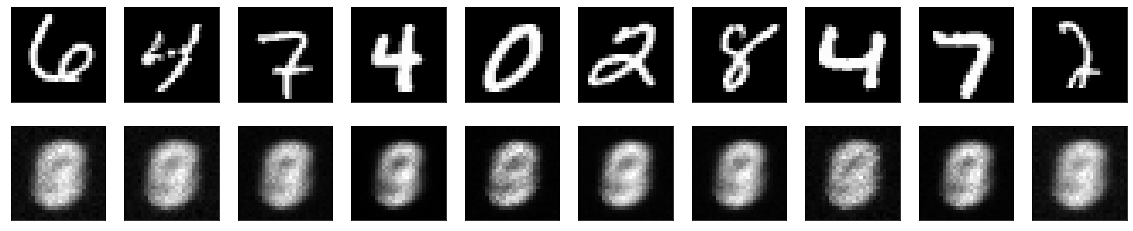

In [15]:
plot_n_random_digits()

In [16]:
autoenc.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_1 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_3 (Dense)              (None, 784)               50960     
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________
